In [1]:
#importing data and necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import matplotlib 
print(matplotlib. __version__)

3.6.0


In [3]:
df = pd.read_csv('Visadataset.csv')

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
#shape of df
df.shape

(25480, 12)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
#missing value check
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### No Null Value 

In [7]:
#check duplicates
df.duplicated().sum()

0

#### No Duplicate Value 

In [8]:
#data Types
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [9]:
#checking for unique values for each columns
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [10]:
#df stats
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [11]:
#numericat features and categorical features in df
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [12]:
print('{} Numerical Columns Are : {}'.format(len(numeric_features),numeric_features))
print('\n{} Categorical Columns are :{}'.format(len(categorical_features),categorical_features))

3 Numerical Columns Are : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

9 Categorical Columns are :['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [13]:
#Unique values in columns

print("Categories in 'continent' variable are : ",end=' ')
print(df['continent'].unique())

print("Categories in 'education of employee' variable are : ",end=' ')
print(df['education_of_employee'].unique())

print("Categories in 'has_job_exeperince' variable are : ",end=' ')
print(df['has_job_experience'].unique())

print("Categories in 'requires_job_training' variable are : ",end=' ')
print(df['requires_job_training'].unique())

print("Categories in 'region_of_emplopyment' variable are : ",end=' ')
print(df['region_of_employment'].unique())

print("Categories in 'unit_of_wage' variable are : ",end=' ')
print(df['unit_of_wage'].unique())

print("Categories in 'full_time_position' variable are : ",end=' ')
print(df['full_time_position'].unique())

print("Categories in 'case_status' variable are : ",end=' ')
print(df['case_status'].unique())


Categories in 'continent' variable are :  ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
Categories in 'education of employee' variable are :  ['High School' "Master's" "Bachelor's" 'Doctorate']
Categories in 'has_job_exeperince' variable are :  ['N' 'Y']
Categories in 'requires_job_training' variable are :  ['N' 'Y']
Categories in 'region_of_emplopyment' variable are :  ['West' 'Northeast' 'South' 'Midwest' 'Island']
Categories in 'unit_of_wage' variable are :  ['Hour' 'Year' 'Week' 'Month']
Categories in 'full_time_position' variable are :  ['Y' 'N']
Categories in 'case_status' variable are :  ['Denied' 'Certified']


In [14]:
#above using loop

df_cat = df[categorical_features]
df_categorical = df_cat.drop('case_id',axis=1)

for col in df_categorical.columns:
    print("Categories in '{}' variable are :".format(col),end=' ')
    print(df_categorical[col].unique())

Categories in 'continent' variable are : ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
Categories in 'education_of_employee' variable are : ['High School' "Master's" "Bachelor's" 'Doctorate']
Categories in 'has_job_experience' variable are : ['N' 'Y']
Categories in 'requires_job_training' variable are : ['N' 'Y']
Categories in 'region_of_employment' variable are : ['West' 'Northeast' 'South' 'Midwest' 'Island']
Categories in 'unit_of_wage' variable are : ['Hour' 'Year' 'Week' 'Month']
Categories in 'full_time_position' variable are : ['Y' 'N']
Categories in 'case_status' variable are : ['Denied' 'Certified']


### Visually Exploring Data

In [15]:
dummies = pd.get_dummies(df['case_status'])

In [16]:
merged = pd.concat([df,dummies],axis=1)

In [17]:
merged

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Certified,Denied
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,1,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,1,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,1,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,1,0


In [18]:
final_df = merged.drop('Denied',axis=1)


In [19]:
final_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Certified
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,1
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,1
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,1


In [20]:
df['has_job_experience'].value_counts()

Y    14802
N    10678
Name: has_job_experience, dtype: int64

<AxesSubplot: xlabel='requires_job_training', ylabel='count'>

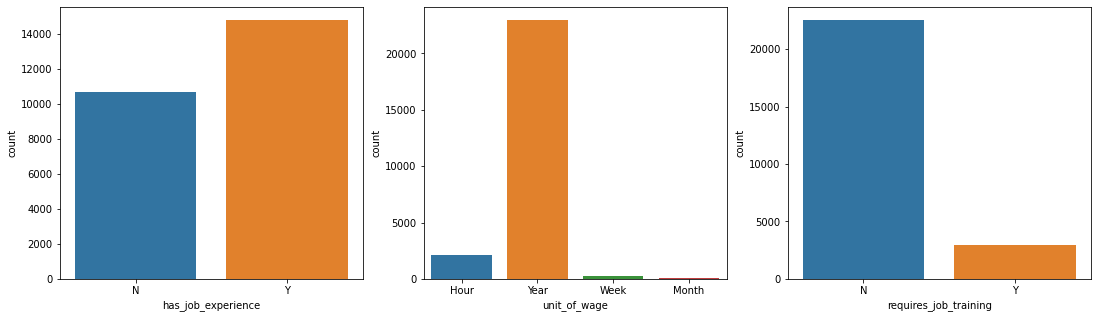

In [21]:
fig ,axes = plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.countplot(data=df,x=df['has_job_experience'])
plt.subplot(142)
sns.countplot(data=df,x=df['unit_of_wage'])
plt.subplot(143)
sns.countplot(data=df,x=df['requires_job_training'])

In [22]:
df.columns


Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<AxesSubplot: xlabel='Certified', ylabel='count'>

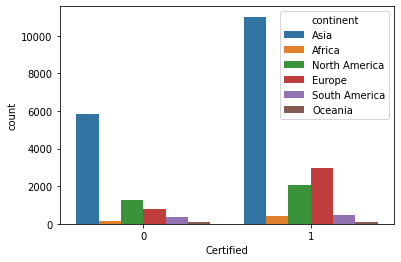

In [25]:
sns.countplot(data=final_df,x=final_df['Certified'],hue='continent')

In [23]:
final_df.corr()

,no_of_employees,yr_of_estab,prevailing_wage,Certified
no_of_employees,1.000000,-0.017770,-0.009523,0.008677
yr_of_estab,-0.017770,1.000000,0.012342,0.008597
prevailing_wage,-0.009523,0.012342,1.000000,0.076198
Certified,0.008677,0.008597,0.076198,1.000000


(-1.25, 1.25, -1.25, 1.25)

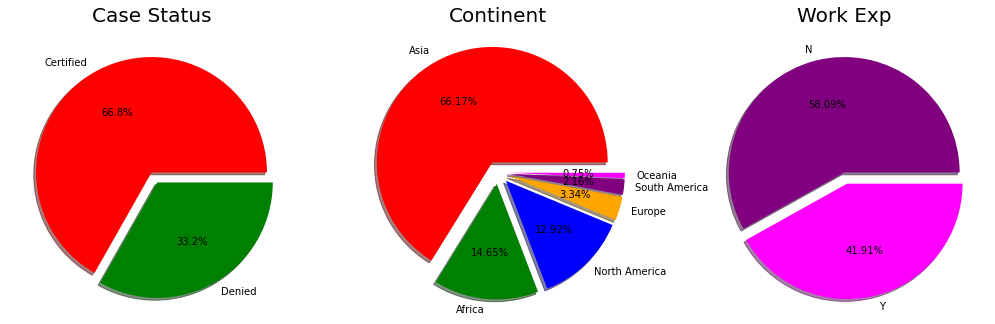

In [66]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['case_status'].value_counts()
labels = 'Certified', 'Denied'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%1.1f%%',shadow=True,explode=[0,0.1])
plt.title('Case Status', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
continent = df['continent'].value_counts()
color = ['red','green','blue','orange','purple','magenta']


plt.pie(continent, colors = color,labels=df['continent'].unique(),autopct = '%1.2f%%',shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.title('Continent', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
has_work_exp = df['has_job_experience'].value_counts()
color = ['purple','magenta']


plt.pie(has_work_exp, colors = color,labels=df['has_job_experience'].unique(),autopct = '%1.2f%%',shadow=True,explode=[0,0.1])
plt.title('Work Exp', fontsize = 20)
plt.axis('off')



In [57]:
df.continent.unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)